In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
# Converting all the 'object' data type to 'category' for convenient operations in regression model.

df['job'] = df['job'].astype('category')
df['marital'] = df['marital'].astype('category')
df['education'] = df['education'].astype('category')
df['default'] = df['default'].astype('category')
df['housing'] = df['housing'].astype('category')
df['loan'] = df['loan'].astype('category')
df['contact'] = df['contact'].astype('category')
df['month'] = df['month'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')
df['poutcome'] = df['poutcome'].astype('category')
df['y'] = df['y'].astype('category')

In [6]:
# Expressing categorical data to binary.
df1 = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'])

In [7]:
# Scaling the data for better regression results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
sc.fit(df1)
sc.transform(df1)

/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vivek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 1.53303429,  0.01047142, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ..., -0.1857    ,
         0.35630932, -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -0.1857    ,
         0.35630932, -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -0.1857    ,
        -2.80655022,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -0.1857    ,
         0.35630932, -0.35630932]])

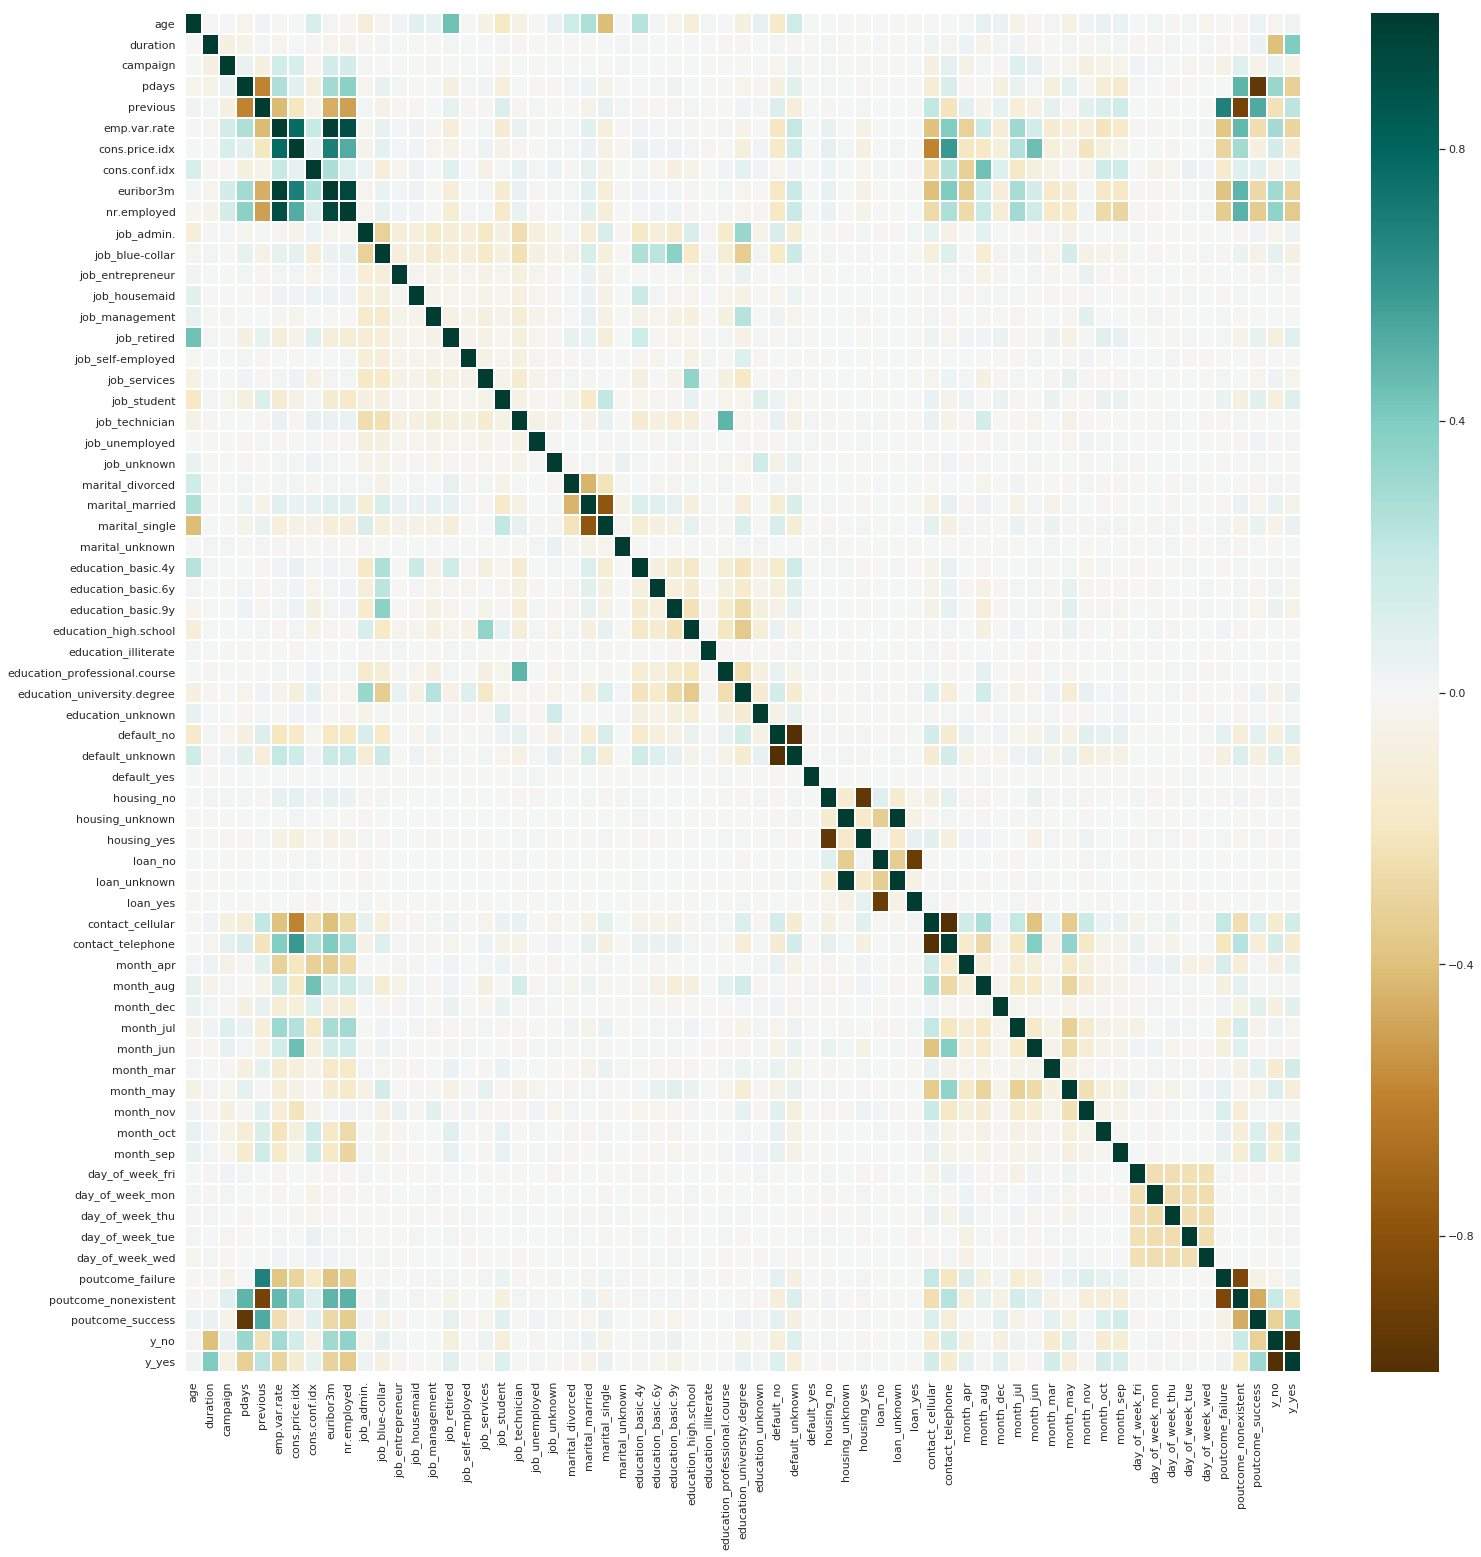

In [10]:
# Generating heat map to find out correlation between the parameters
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df1.corr(), linewidth=1, cmap = 'BrBG')

In [11]:
# Some significant correlation of 'y_yes' is found with : 'duration',pdays','previous','emp.var.rate','euribor3m','nr.employed'
# Maximum correlation is with 'duration' but that is irrelevant in deciding whom to call.
# Dropping 'duration'
df2 = df1.drop('duration', axis=1)

In [19]:
# Splitting the data for regression models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2.drop(['y_yes','y_no'], axis=1), df2['y_yes'], test_size=0.3, random_state=25)

# Importing classification report
from sklearn.metrics import classification_report

In [44]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(classification_report(y_test,lr_pred))

/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10949
           1       0.68      0.19      0.29      1408

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [21]:
# SVC model
from sklearn.svm import SVC
svc = SVC()
svm = svc.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
print(classification_report(y_test,svm_pred))

/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10949
           1       0.64      0.21      0.31      1408

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.77      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [22]:
# KNearestNeighbors model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
knn_pred  = knn.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     10949
           1       0.34      0.33      0.34      1408

   micro avg       0.85      0.85      0.85     12357
   macro avg       0.63      0.63      0.63     12357
weighted avg       0.85      0.85      0.85     12357



In [24]:
#Trying to choose a better K Value
error_rate=[]

for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))    

Text(0, 0.5, 'Error Rate')

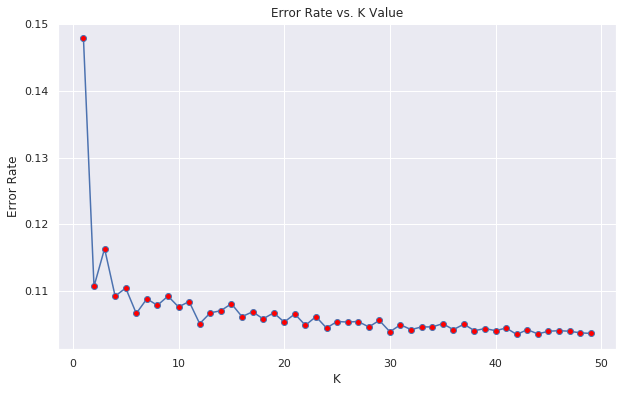

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate, marker='o',markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
# Taking K=50 as new K value
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)
knn_pred  = knn.predict(x_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10949
           1       0.65      0.20      0.31      1408

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [39]:
# Comparing regression models
from sklearn.metrics import precision_score
print('Precision for Logistic Regression model: ',format(precision_score(y_test, lr_pred)))
print('Precision for SVM model: ',format(precision_score(y_test, svm_pred)))
print('Precision for KNN model: ',format(precision_score(y_test, knn_pred)))

Precision for Logistic Regression model:  0.6814621409921671
Precision for SVM model:  0.6365638766519823
Precision for KNN model:  0.648960739030023


In [ ]:
# Comapring every parameter individually with output

Text(0.5, 1.0, 'Age wise conversion')

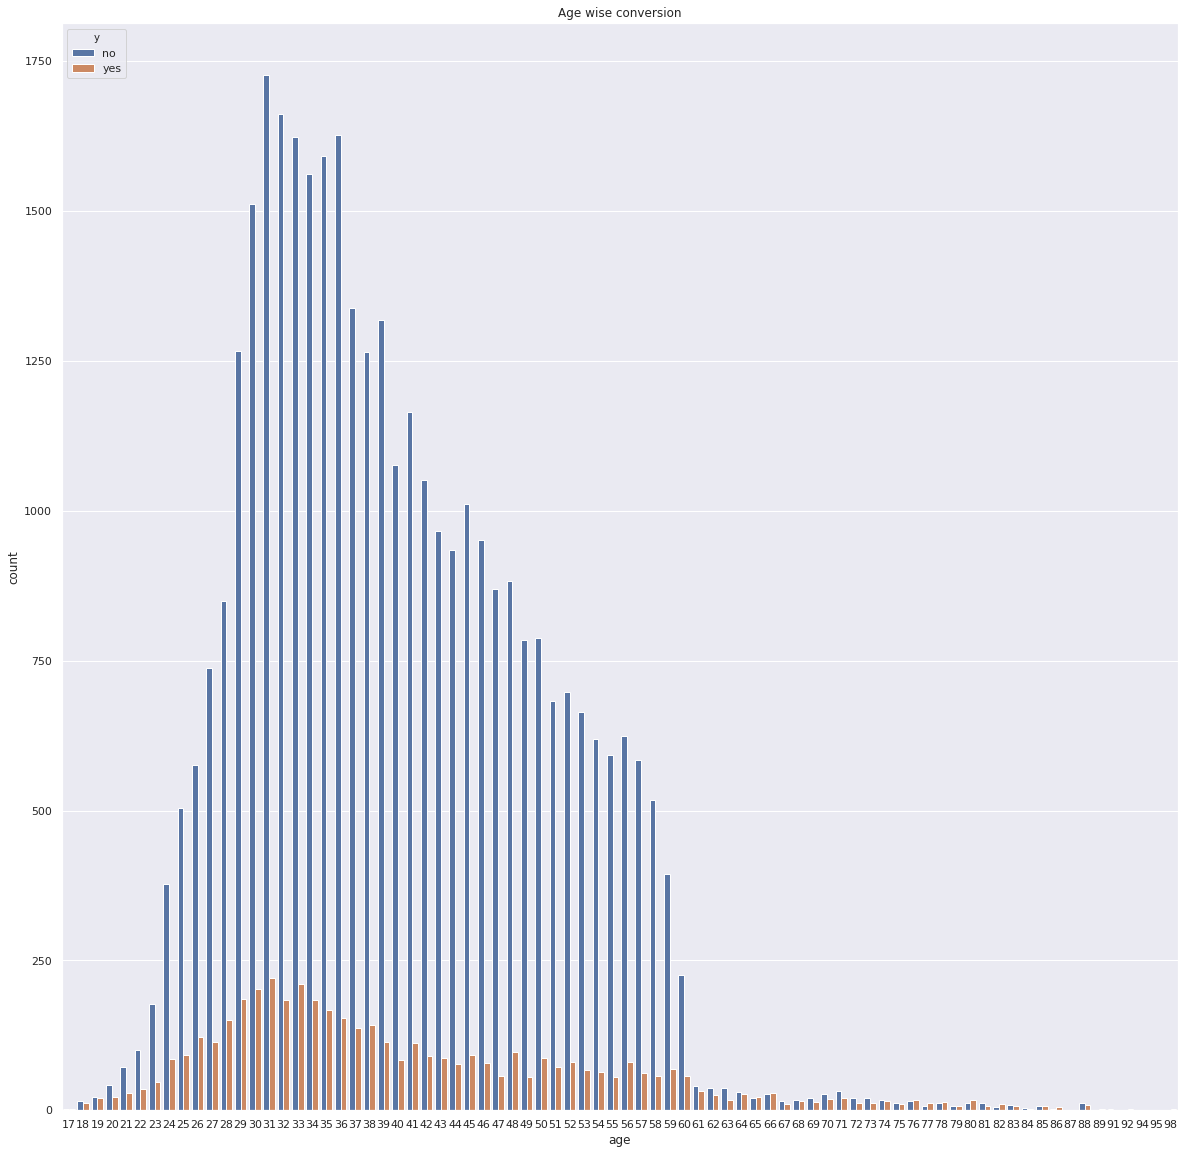

In [57]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(x='age', hue='y', data=df)
plt.title('Age wise conversion')

In [56]:
# Conversion rate is high for people of age < 23 and age > 60

Text(0.5, 1.0, 'Job wise conversion')

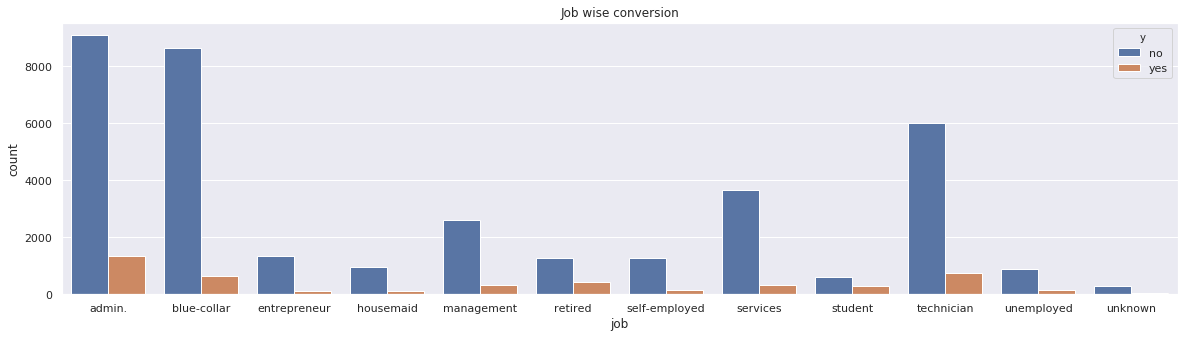

In [64]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='job', hue='y', data=df)
plt.title('Job wise conversion')

In [59]:
# Independent of job profile

Text(0.5, 1.0, 'Marital status wise conversion')

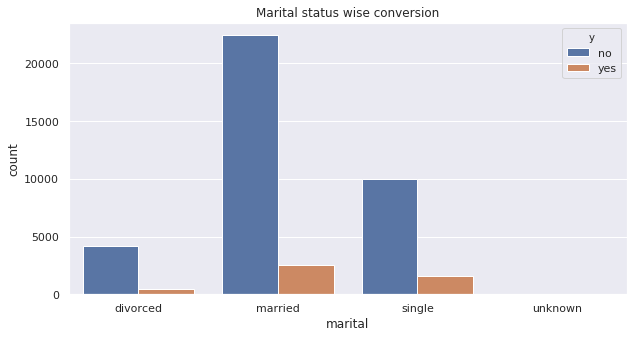

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='marital', hue='y', data=df)
plt.title('Marital status wise conversion')

In [65]:
#Independent of marital status 

Text(0.5, 1.0, 'Education level wise conversion')

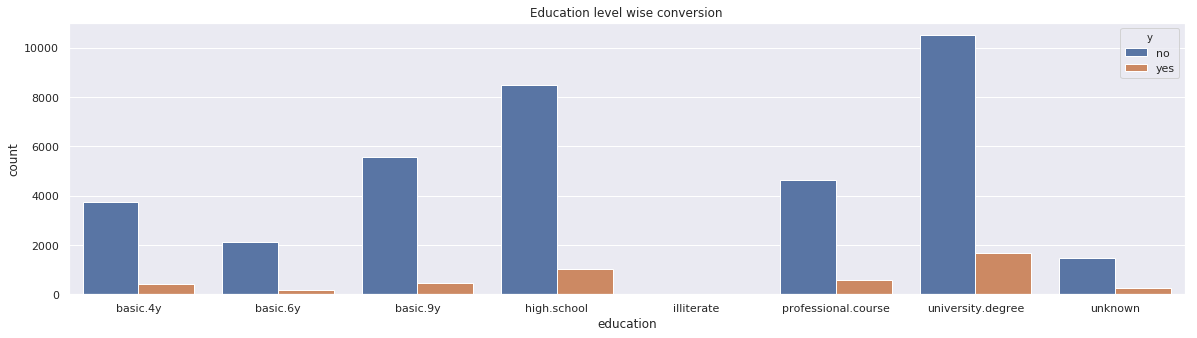

In [67]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='education', hue='y', data=df)
plt.title('Education level wise conversion')

In [68]:
#Independent of education level

Text(0.5, 1.0, 'Credit Default wise conversion')

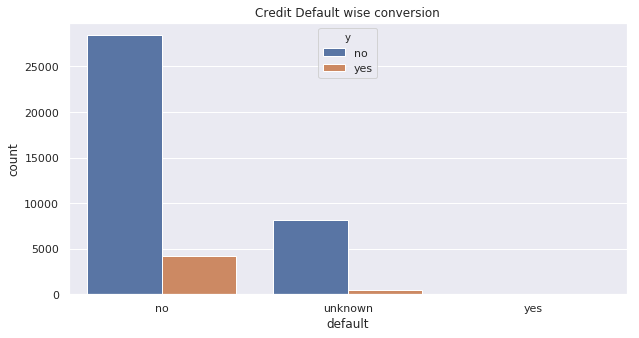

In [69]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='default', hue='y', data=df)
plt.title('Credit Default wise conversion')

In [70]:
# Independent of credit default record

Text(0.5, 1.0, 'Housing loan beneficiary wise conversion')

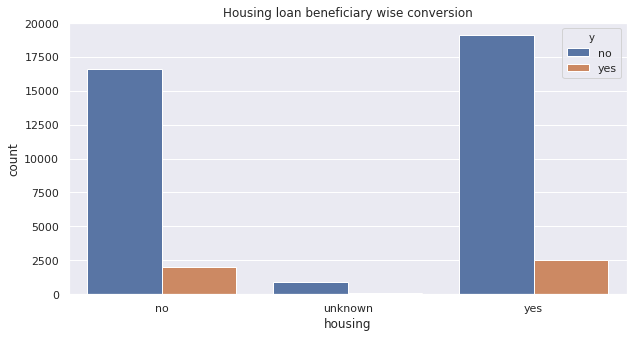

In [72]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='housing', hue='y', data=df)
plt.title('Housing loan beneficiary wise conversion')

In [73]:
#Independent of housing loan

Text(0.5, 1.0, 'Personal loan wise conversion')

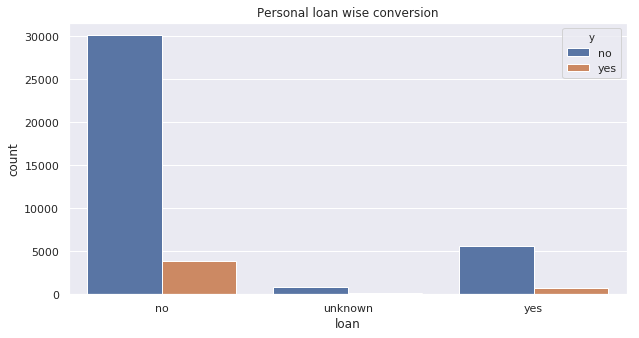

In [74]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='loan', hue='y', data=df)
plt.title('Personal loan wise conversion')

In [75]:
# Independent of personal loan

Text(0.5, 1.0, 'Mode of contact wise conversion')

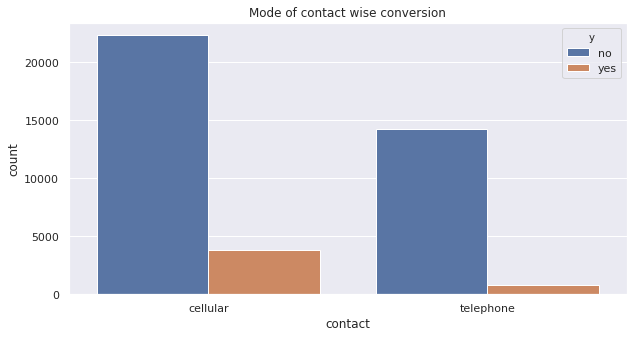

In [76]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='contact', hue='y', data=df)
plt.title('Mode of contact wise conversion')

In [77]:
#Independent of mode of contact

Text(0.5, 1.0, 'Month of contact wise conversion')

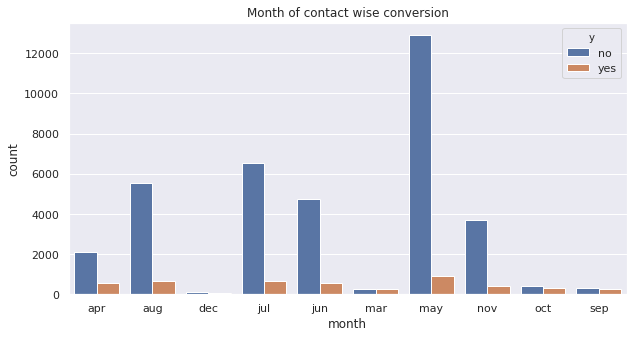

In [78]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='month', hue='y', data=df)
plt.title('Month of contact wise conversion')

In [79]:
# The highest conversion rate were in the months of March, October and September  

Text(0.5, 1.0, 'Day of the week on which contacted wise conversion')

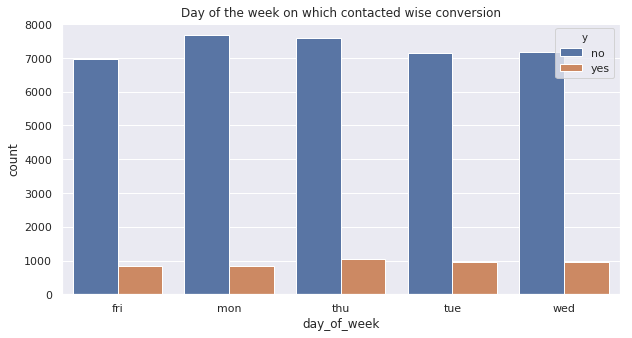

In [80]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='day_of_week', hue='y', data=df)
plt.title('Day of the week on which contacted wise conversion')

In [81]:
#Independent of day of the week

Text(0.5, 1.0, 'Number of times the person was contacted wise conversion')

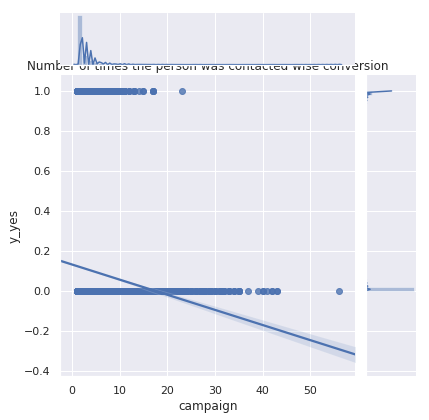

In [86]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='campaign', y='y_yes', data=df1, kind = 'reg')
plt.title('Number of times the person was contacted wise conversion')

In [87]:
# People got converted in upto 15 calls. 

Text(0.5, 1.0, 'Number of times the person was contacted in previous campaign wise conversion')

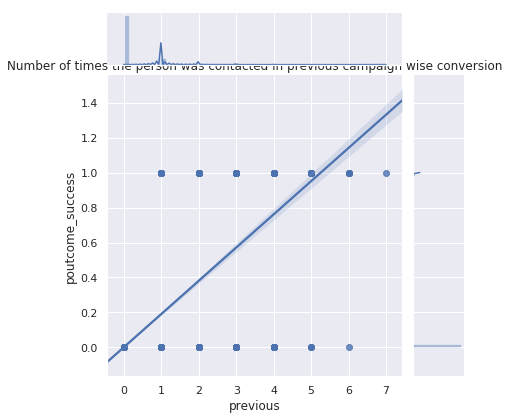

In [90]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='previous', y='poutcome_success', data=df1, kind = 'reg')
plt.title('Number of times the person was contacted in previous campaign wise conversion')

In [91]:
# Conversion increases with number of contacts 

Text(0.5, 1.0, 'Employment variation rate wise conversion')

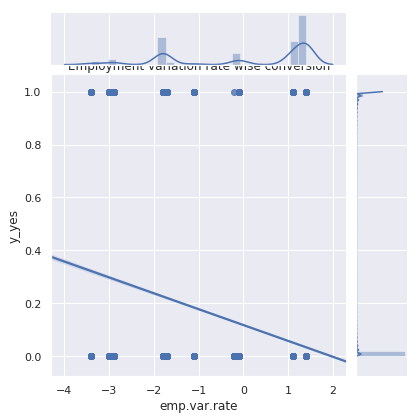

In [92]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='emp.var.rate', y='y_yes', data=df1, kind = 'reg')
plt.title('Employment variation rate wise conversion')

In [93]:
# More conversion with lesser employment variation rate.

Text(0.5, 1.0, 'Consumer price index wise conversion')

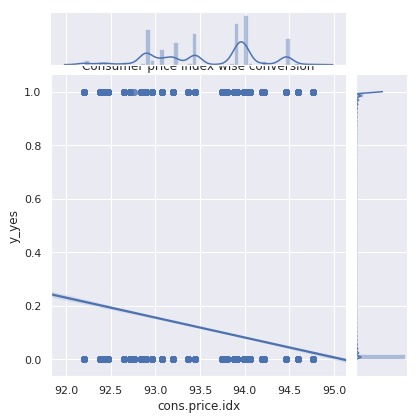

In [95]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='cons.price.idx', y='y_yes', data=df1, kind = 'reg')
plt.title('Consumer price index wise conversion')

In [96]:
# Decreases with consumer price index

Text(0.5, 1.0, 'Consumer confidence index wise conversion')

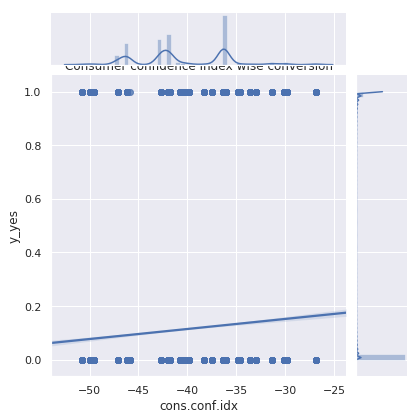

In [97]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='cons.conf.idx', y='y_yes', data=df1, kind = 'reg')
plt.title('Consumer confidence index wise conversion')

In [98]:
# Slight increase with consumer confidence index

Text(0.5, 1.0, 'Euribor 3 month rate wise conversion')

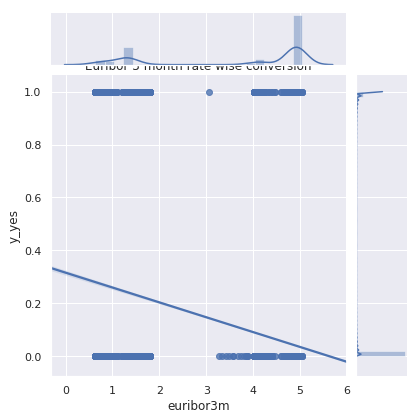

In [100]:
sns.set(rc={'figure.figsize':(10,5)})
sns.jointplot(x='euribor3m', y='y_yes', data=df1, kind = 'reg')
plt.title('Euribor 3 month rate wise conversion')

In [101]:
# Decreases with euribor 3 month rate

Text(0.5, 1.0, 'Number of employees wise conversion')

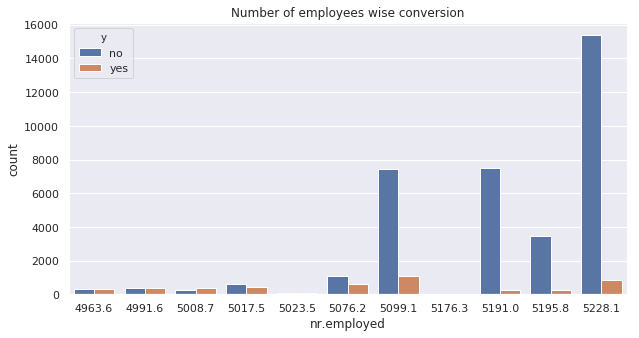

In [113]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='nr.employed', hue='y', data=df)
plt.title('Number of employees wise conversion')

In [103]:
# Optimum number of employees is nearly 5000

Text(0.5, 1.0, 'Gap between days the person was contacted in two campaigns wise conversion')

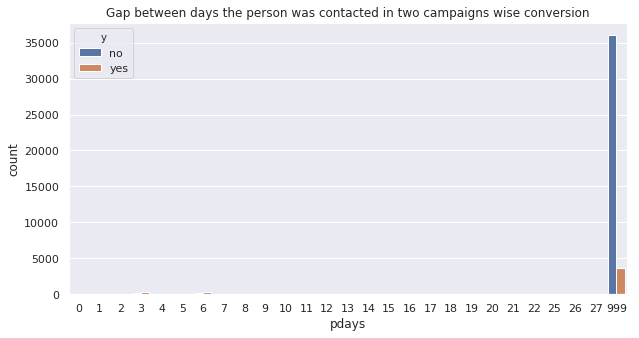

In [104]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='pdays', hue='y', data=df)
plt.title('Gap between days the person was contacted in two campaigns wise conversion')

In [111]:
grp_pdays = df.groupby(['y','pdays'])
count_pdays = grp_pdays['y'].count()
print('Last month call conversions = {:.3f}%'.format((count_pdays['yes'][:-1].sum())*100/(count_pdays['yes'][:-1].sum()+count_pdays['no'][:-1].sum())))
print('Overall call conversions = {:.3f}%'.format((count_pdays['yes'].sum())*100/(count_pdays['yes'].sum()+count_pdays['no'].sum())))

Last month call conversions = 63.828%
Overall call conversions = 11.265%


In [112]:
# More conversion rate if the person is contacted again within a month.

In [ ]:
#Conclusions :

# Best precision score obtained is from Logistic Regression model which is 0.68.
# The conversion is independent of the factors such as 'Job Profile', 'Marital Status', 'Education Level', 'Credit Default Record', 'Housing Loan', 'Personal Loan', 'Mode of contact' and 'Day of the week contacted'.
# Conversion rate is high for people of age < 23 and age > 60.
# The highest conversion rate were in the months of March, September and October.  
# Conversion increases with number of contacts to a person but only upto 15 calls.
# Converion decreases with increasing 'euribor 3 month rate', 'consumer price index' and 'employment variation rate'.
# Optimum number of employees is nearly 5000 as increaing the number of employees is not directly proportional to number of conversions.
# Conversion rate is higher(63.8%) if a person is contacted again within a month.